# linear regression approach for estimating the price of an automobile

### Dataset use in the following notebook was downloaded from kaggle
https://www.kaggle.com/toramky/automobile-dataset

In [1]:
cd C:\Users\shaikh

C:\Users\shaikh


In [2]:
# importing different library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

In [3]:
#the dataset is in csv format let begin with reading the dataset by using read command from pandas it will return a dataframe
df=pd.read_csv('Automobile_data.csv')

In [4]:
# first 20 row of the dataframe
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


we can see there are missing value in the dataframe marked as ?.  
there are 26 unique columns.   
let begin with replacing the ? with nan 

In [5]:
df=df.replace(to_replace='?', value=np.nan)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


In [6]:
# let see the different data type we have in the columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# converting the object type into numeric so that we can describe the dataset
df['normalized-losses']=pd.to_numeric(df['normalized-losses'],errors='coerce')
df['bore']=pd.to_numeric(df['bore'],errors='coerce')
df['stroke']=pd.to_numeric(df['stroke'],errors='coerce')
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')
df['peak-rpm']=pd.to_numeric(df['peak-rpm'],errors='coerce')
df['price']=pd.to_numeric(df['price'],errors='coerce')
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [556]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

now it seems to be a better dataset as compare to the previous dataset  because now the value are proper format.

In [557]:
# viewing the object type value in our dataframe to ensure we didnt miss any int or float value
df.select_dtypes(include='object', exclude=None).head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [9]:
# let begin with some descriptive statistic
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


if we observe the count value above we find that majority of the data is missing in the normalize losses.  
price is distributed in a wide range from 5118 to 45400.  

In [10]:
# binary encoding
mapper={'gas':1, 'diesel':0}
df['fuel-type']=df['fuel-type'].replace(mapper)

In [11]:
# ordinal encoding
mapper_doors={'two':2, 'four':4}
df['num-of-doors']=df['num-of-doors'].replace(mapper_doors)

In [12]:
# binary encoding
mapper_asp={'std':1, 'turbo':0}
df['aspiration']=df['aspiration'].replace(mapper_asp)

In [13]:
# ordinal encoding
mapper_cyl={'four':4, 'six':6,'five':5, 'eight':8, 'two':2, 'three':3, 'twelve':12}
df['num-of-cylinders']=df['num-of-cylinders'].replace(mapper_cyl)

In [14]:
df.select_dtypes(include='object', exclude=None).head()

,make,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,convertible,rwd,front,dohc,mpfi
1,alfa-romero,convertible,rwd,front,dohc,mpfi
2,alfa-romero,hatchback,rwd,front,ohcv,mpfi
3,audi,sedan,fwd,front,ohc,mpfi
4,audi,sedan,4wd,front,ohc,mpfi


In [15]:
# let see different manufacturer do we have over here
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
# unique drive wheel
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [17]:
# unique engine type
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [18]:
# unique fuel sysytem
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [20]:
# missing value more then 15 % in our dataset
df.isnull().sum()/df.shape[0]*100>15

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

more then 15% of the value is miinsing from the normalized losses. we wil delete that column

In [21]:
# dropping the normalized-losses from the dataset
df=df.drop(columns='normalized-losses')

Imputing the missing values with mean or median by viewing the graph.

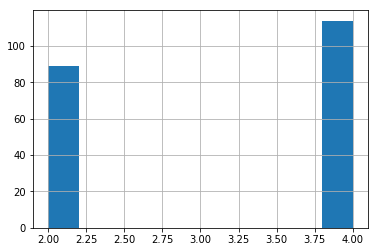

In [23]:
df['num-of-doors'].hist()

In [24]:
# 4 seems to be appropraite value for filling the missing value
df['num-of-doors']=df['num-of-doors'].fillna(value=4)

mean: 3.3291707317073187
median: 3.31


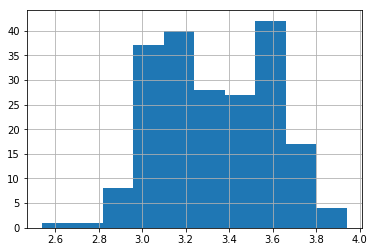

In [34]:
# histogram of bore
print('mean:',df['bore'].mean())
print('median:',df['bore'].median())
df['bore'].hist()

In [26]:
# both mean and median seems to be close to each other filling with median
df['bore']=df['bore'].fillna(value=3.3)

mean: 3.2553170731707257
median: 3.29


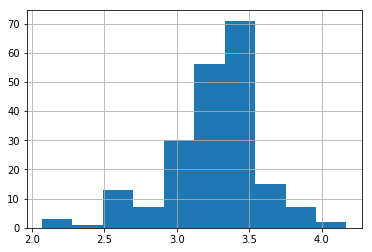

In [33]:
# histogram of stroke
print('mean:',df['stroke'].mean())
print('median:',df['stroke'].median())
df['stroke'].hist()

In [28]:
# filling it with mean
df['stroke']=df['stroke'].fillna(value=3.25)

mean: 104.25615763546799
median: 95.0


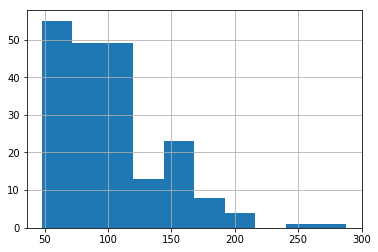

In [32]:
# histogram of horsepower
print('mean:',df['horsepower'].mean())
print('median:',df['horsepower'].median())
df['horsepower'].hist()

In [35]:
# imputing histogram with median
df['horsepower']=df['horsepower'].fillna(value=95)

mean: 5125.369458128079
median: 5200.0


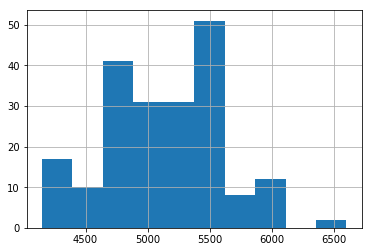

In [36]:
# histogram of peak rpm
print('mean:',df['peak-rpm'].mean())
print('median:',df['peak-rpm'].median())
df['peak-rpm'].hist()

In [37]:
# imputing it with mean
df['peak-rpm']=df['peak-rpm'].fillna(value=5125)

**since the price is ther predicring parametere we will drop the missing price**

In [38]:
# finding the missing value anf getting its index
index_price=df[df['price'].isnull()].index
index_price

Int64Index([9, 44, 45, 129], dtype='int64')

In [39]:
# dropping the row where the price data is missing
df=df.drop(index=index_price)

In [40]:
# since we drop the few index we have to reset the index in order to get continous integer index. we will use reset command.
df=df.reset_index(drop=True)
df.head(15)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,1,1,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,1,1,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,1,1,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,1,1,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,1,1,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,audi,1,1,2.0,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,audi,1,1,4.0,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,audi,1,1,4.0,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,audi,1,0,4.0,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,2,bmw,1,1,2.0,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


In [41]:
# price is our target varabile let drop it from the dataframe
target=df['price']
df=df.drop('price', axis=1)

In [42]:
# checking for any null value inour dataframe
df.isnull().any()

symboling            False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
dtype: bool

In [43]:
# checking any null value in our target variable
target.isnull().any()

False

**now our dataset seems to be preety clean now we can begin with other steps such as eda and estimation etc**

# Creating new feature

In [44]:
# creating a factor of hp_per_mpg(to capture the intuition of efficiecncy) 
df['hp_per_mpg']=df['horsepower']/df['highway-mpg']

In [45]:
# creating a factor of cc
df['cc']=df['stroke']*df['bore']*df['num-of-cylinders']

# let begin with some eda

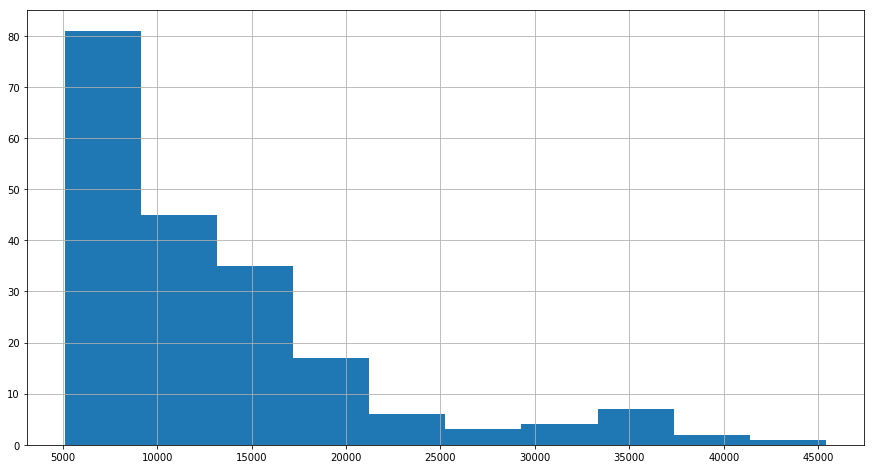

In [47]:
plt.rcParams["figure.figsize"] = (15,8)
target.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x58c37b5d68>,
 'caps': [<matplotlib.lines.Line2D at 0x58c37be668>,
 'boxes': [<matplotlib.lines.Line2D at 0x58c37b5c18>],
 'medians': [<matplotlib.lines.Line2D at 0x58c37beeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x58c37c9320>],
 'means': []}

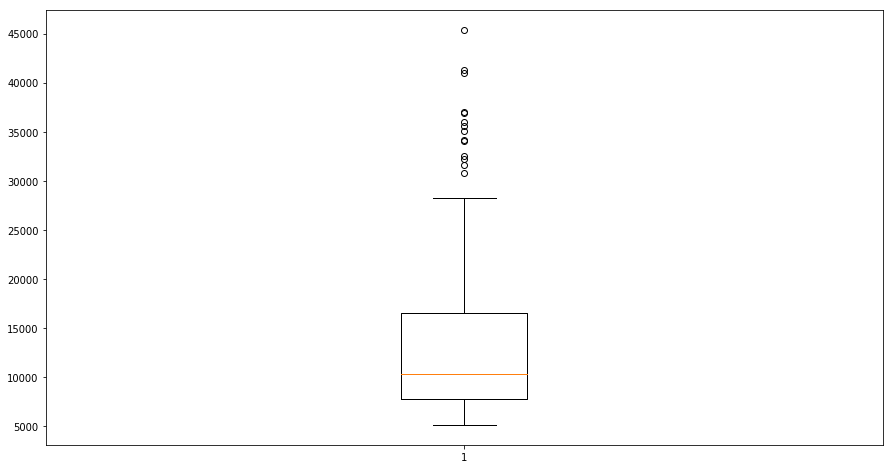

In [48]:
plt.boxplot(target)

we can see that majority of the car is in the price range from 5000 to 15000
but the price beyond 30000 is fishy.

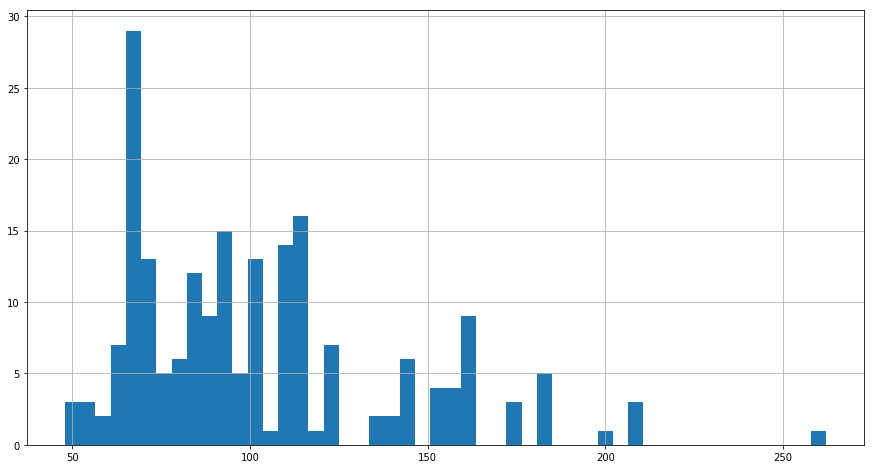

In [49]:
df['horsepower'].hist(bins=50)

there are few car whose horsepower is more than 200 therefore we can expect that it would be a luxuriou car car .   
the majority of the horsepower lie between 60 to 120

In [51]:
# making data frame for number of car manufactured by different company
count_of_company=df['make'].value_counts()
count_of_company_df=pd.DataFrame(count_of_company)
count_of_company_df['index']=count_of_company_df.index
count_of_company_df=count_of_company_df.reset_index(drop=True)
count_of_company_df

,make,index
0,32,toyota
1,18,nissan
2,17,mazda
3,13,mitsubishi
4,13,honda
5,12,volkswagen
6,12,subaru
7,11,peugot
8,11,volvo
9,9,dodge


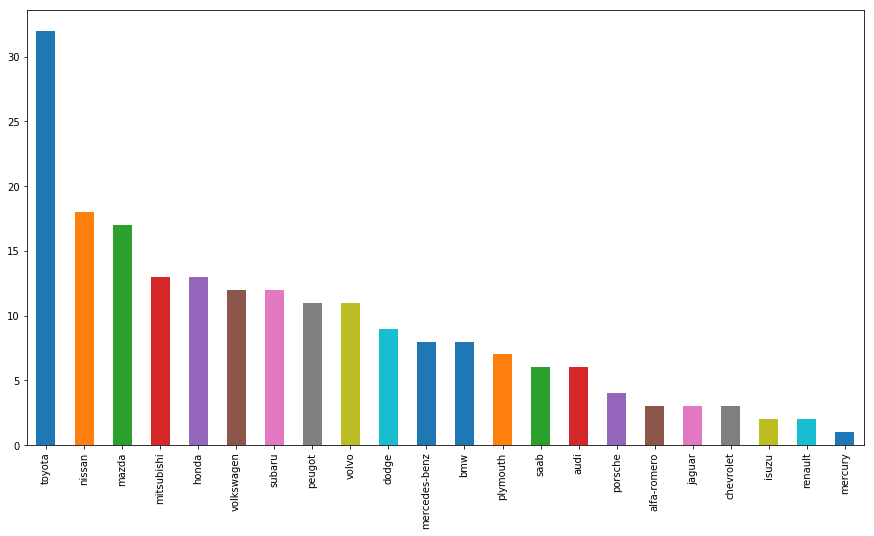

In [52]:
#let see what different company do we have
df['make'].value_counts().plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

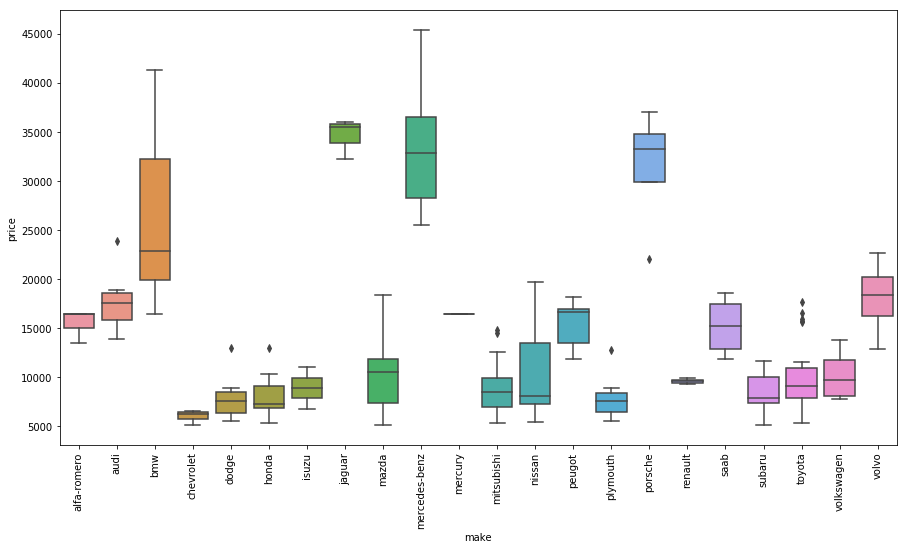

In [53]:
#maximum number of car is manufacture by toyota followed by nissan and the least number of car is from mercury
# let see what make the toyota to lead the game
sns.boxplot(x=df['make'], y=target)
plt.xticks(rotation=90)

both of the above graph show that generally the cheaper car is sold more and the high end car like porche, bmw and audi are sold less 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

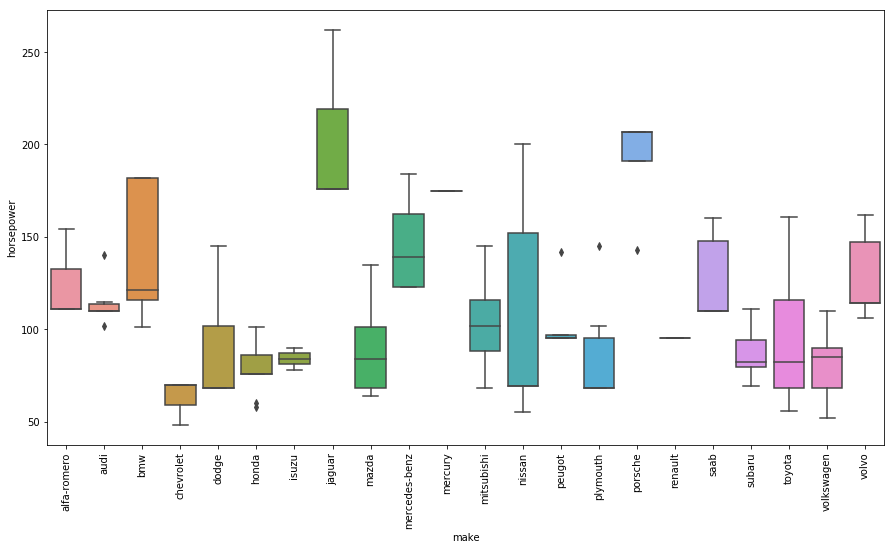

In [54]:
#let see why toyota is sold more as compare to luxury car
sns.boxplot(x=df['make'], y=df['horsepower'])
plt.xticks(rotation=90)

In [55]:
# its seems to be that luxury car are producing more horsepower than the normal car let separate the data as high horsepower
# and low horsepower and let see its boxplot
df_high_horsepower=df[df['horsepower']>100]
count_of_high_horsepower=df_high_horsepower['make'].value_counts()
count_of_high_horsepower_df=pd.DataFrame(count_of_high_horsepower)
count_of_high_horsepower_df['index']=count_of_high_horsepower_df.index
count_of_high_horsepower_df.reset_index(drop=True)

,make,index
0,12,toyota
1,11,volvo
2,8,bmw
3,8,mercedes-benz
4,7,mitsubishi
5,6,saab
6,6,nissan
7,6,audi
8,5,mazda
9,4,porsche


In [56]:
result = pd.merge(count_of_high_horsepower_df, count_of_company_df,on='index',how='inner')
result.head()

,make_x,index,make_y
0,12,toyota,32
1,11,volvo,11
2,8,bmw,8
3,8,mercedes-benz,8
4,7,mitsubishi,13


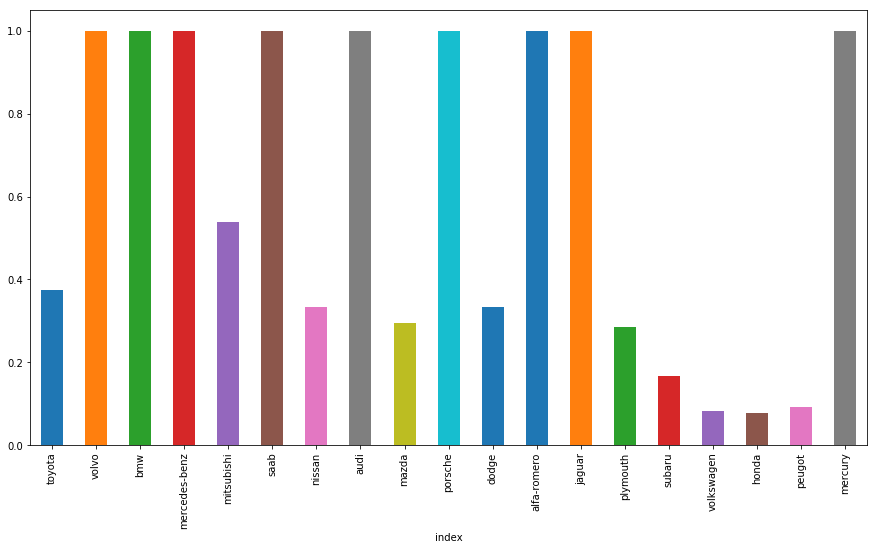

In [57]:
result['% change']=result['make_x']/result['make_y']
result=result.set_index('index')
result['% change'].plot.bar()

from the above we can hypothesise that luxurious car produce more then 100 hp and they are costlier.   
the list of luxurious car are as follow volvo mercedes benz bmw saab porsche alfa-romeao jaguar mercury

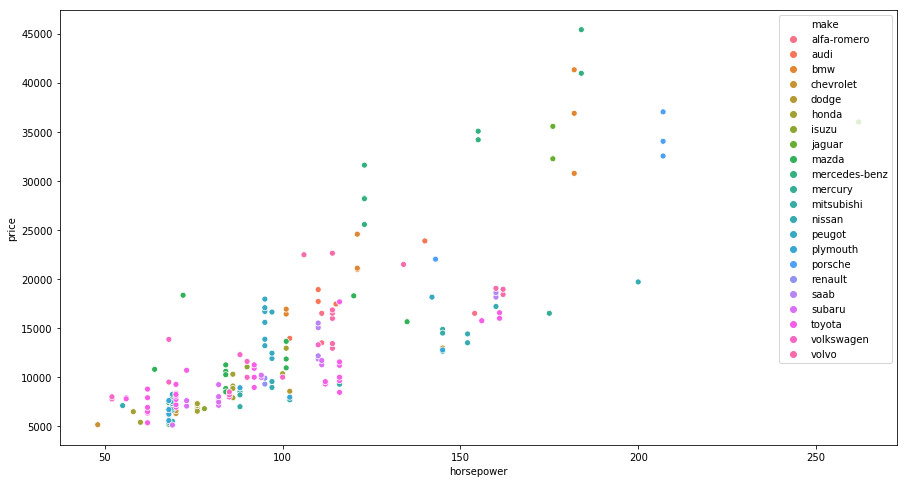

In [59]:
# let se the relationship between price and horsepower that we have hypothesise
sns.scatterplot(df['horsepower'], target,hue=df['make'])

from the graph we can see that as the horsepower increases the price also increases toyota is manufacturing in wide range from 55 to 160 hp at a relatively lower price then that of other thats why they are selling more as compare to there competetior

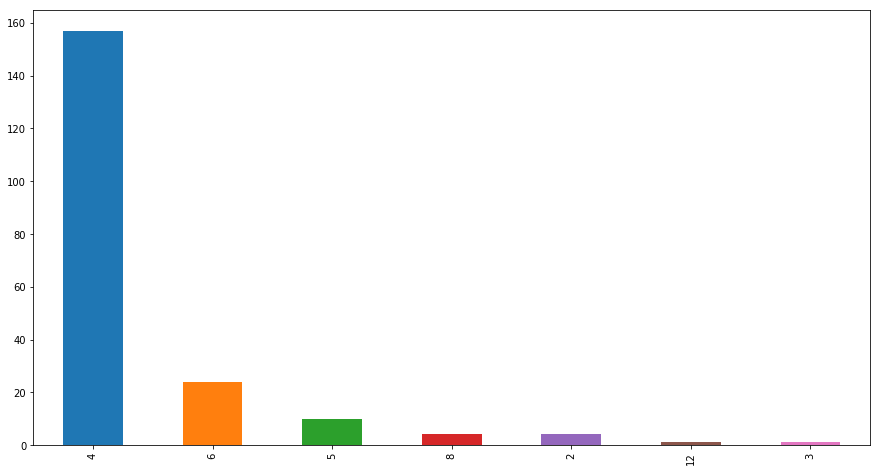

In [60]:
df['num-of-cylinders'].value_counts().plot.bar()

majority of the car is 4 cylinder car

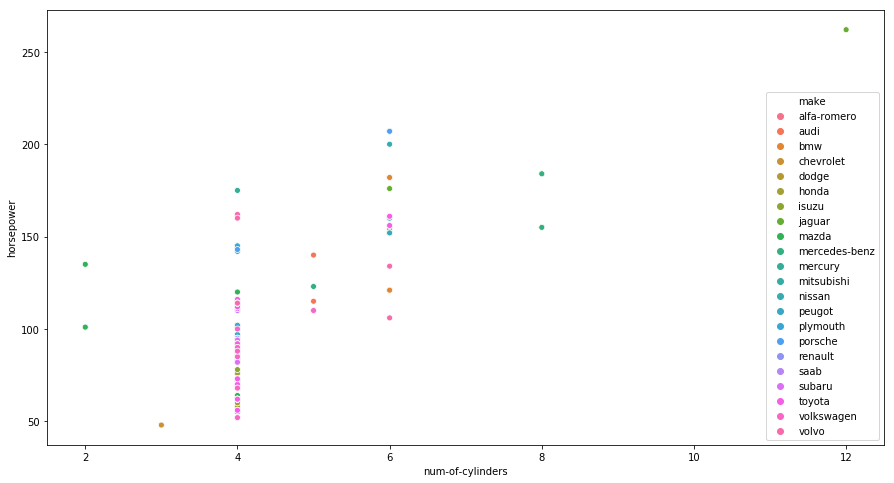

In [61]:
sns.scatterplot(df['num-of-cylinders'],df['horsepower'],hue=df['make'])

generally as the num of cylinder increases horsepower also increases and toyota has marked its centre of business around 4 to 6 cylinder engine but the avg of 2 cylinder engine is more then 3 as well as four cylinder the 2 cylinder seems to be doubious and its manufacturer is mazda

let see the price trend it should be increasing one

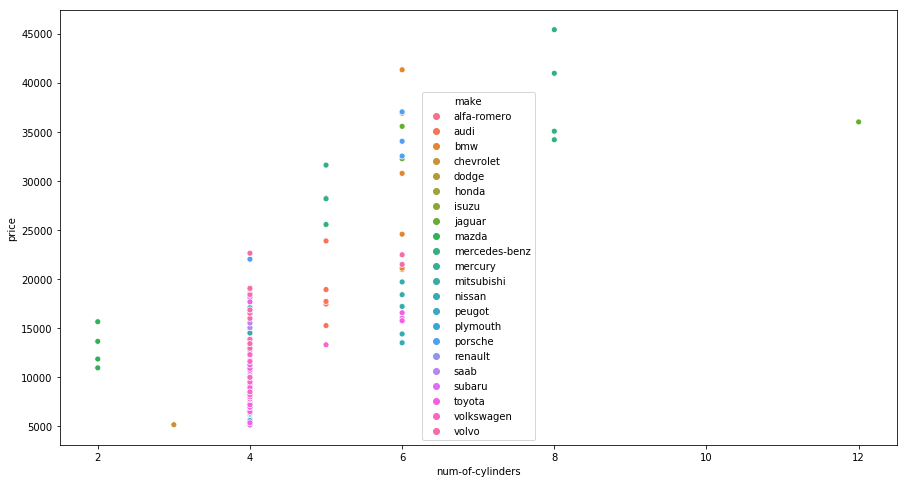

In [62]:
sns.scatterplot(df['num-of-cylinders'],target,hue=df['make'])

from 4 cylinder engine the price increses upto 8 cylinder then for 12 cylinder there is decrese in price 

In [63]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'hp_per_mpg',
       'cc'],
      dtype='object')

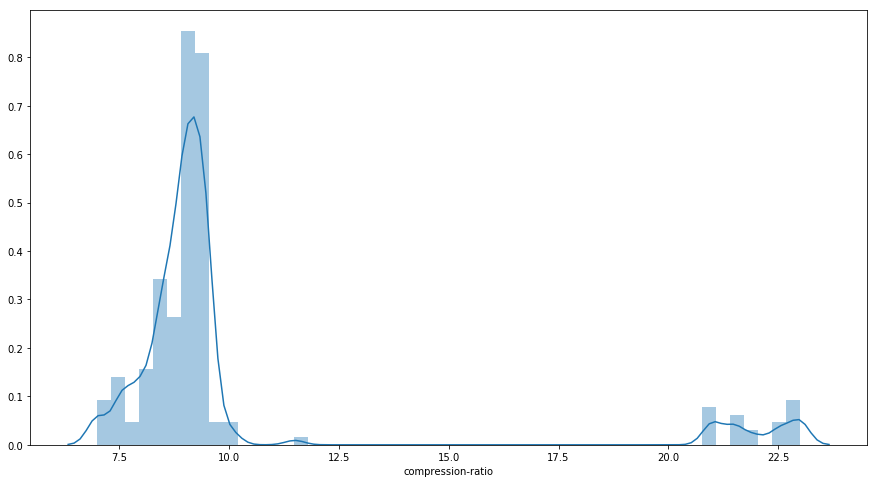

In [64]:
sns.distplot(df['compression-ratio'])

compression ratio is seems to be having 2 peak one at 6 to 10 and other between 21 to 22

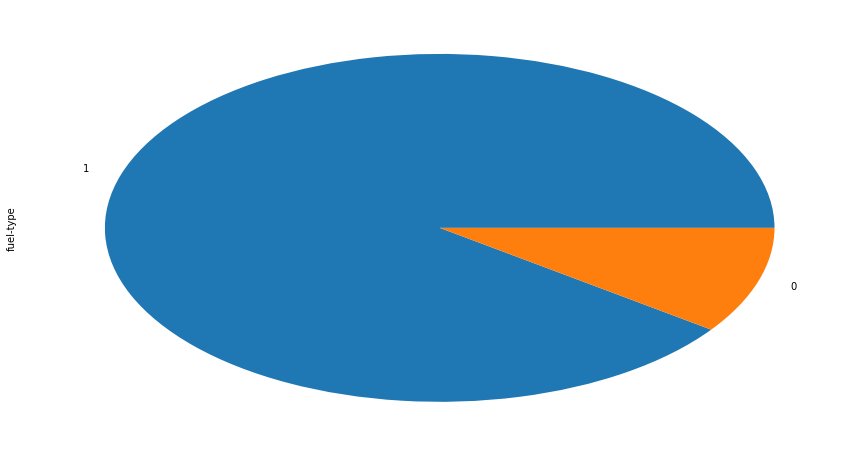

In [65]:
df['fuel-type'].value_counts().plot.pie()

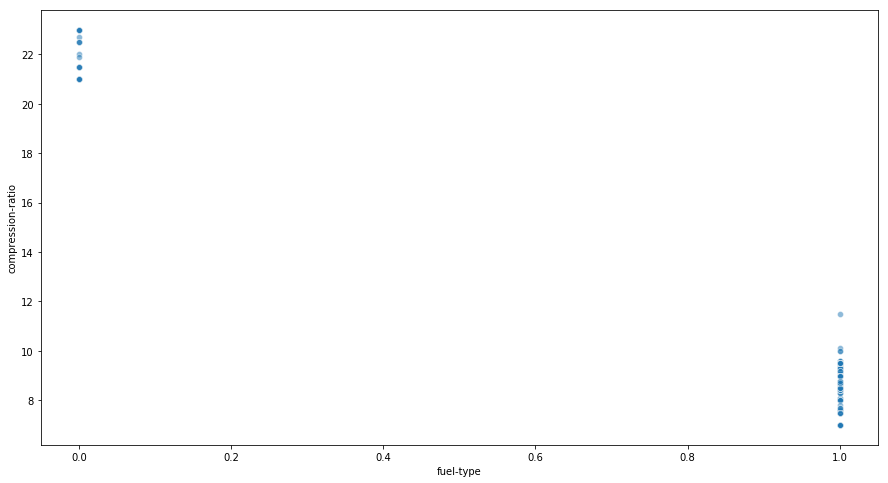

In [66]:
# let see relation between fuel type and compression ratio
sns.scatterplot(x=df['fuel-type'],y= df['compression-ratio'], alpha=0.5)

as we can see that majority of the car uses gasoline as there fuel diesel car seems to be less popular.   
the compression ratio is very unique for gasoline its range between 6 to 12 and for diesel it much higher 21 to 24

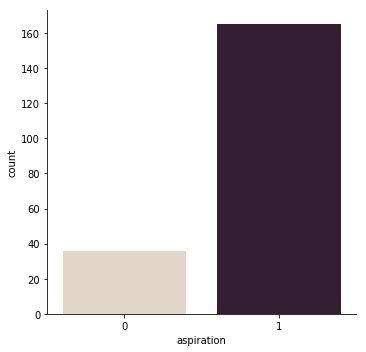

In [67]:
# let se aspiration 
sns.catplot(x='aspiration', kind="count", palette="ch:.25", data=df)

it can be seen that majority(160) car are std aspiration and where as turbo account for approximately 30.   
let see why there is difference

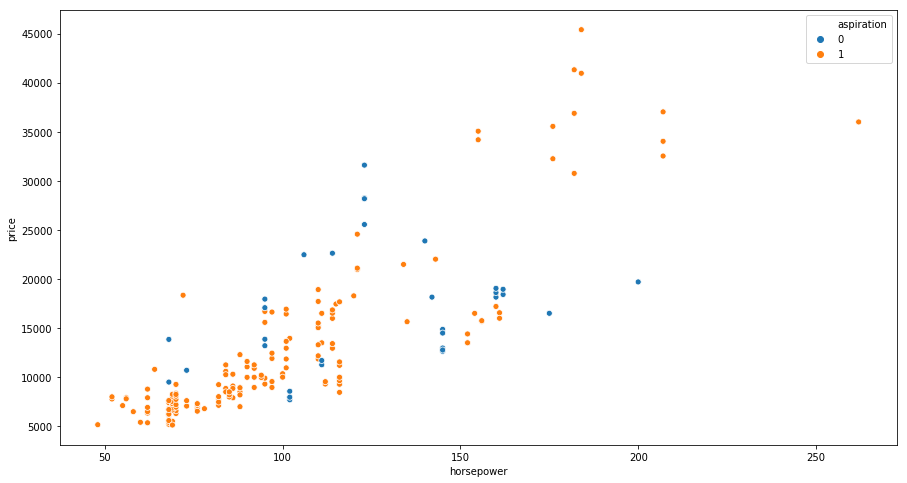

In [68]:
sns.scatterplot(x=df['horsepower'],y=target, hue=df['aspiration'])

the standard aspiration is spread all across the graph.   
aspiration type turbo is well famous from 90 hp to 170 hp there seems to be 3 point between 65 and 75.     
**generally turbo aspirated car are costlier as compare to the std aspirated for the same horsepower**.     
today the turbo are producing way much more power then this so this might be an old data set collected in 80 or 90.   

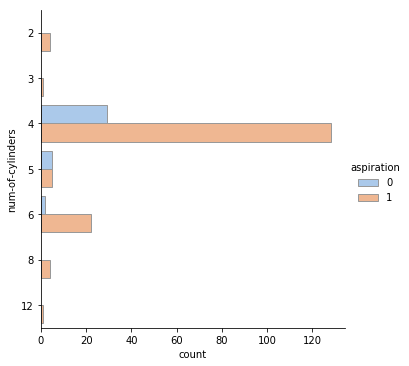

In [69]:
sns.catplot(y="num-of-cylinders", hue="aspiration", kind="count",palette="pastel", edgecolor=".6",data=df)

majority of the turbo type are in 4 cylinders car but they are more popular in 5 cylinder car.   
let hypothesise that for the same number of cylinder turbo produces more hp then the std

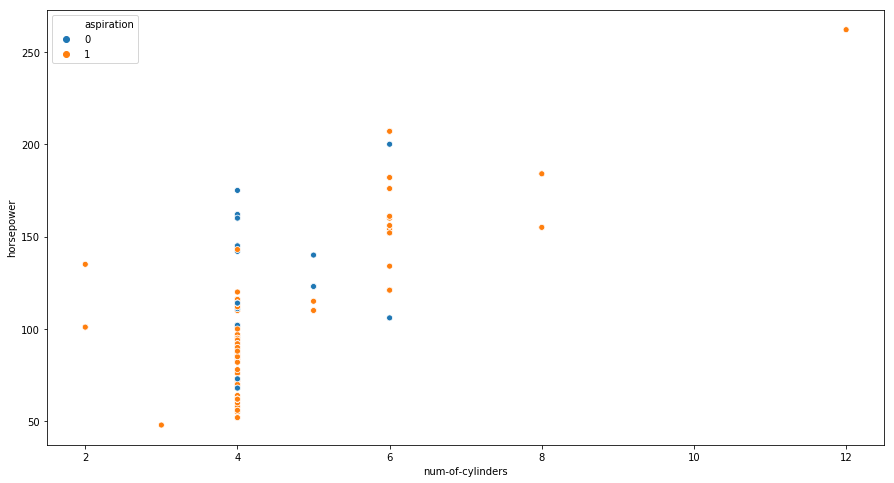

In [70]:
sns.scatterplot(x=df['num-of-cylinders'],y=df['horsepower'], hue=df['aspiration'])

our hypothesis is correct that turbo produces more power then std for the same number of cylinders

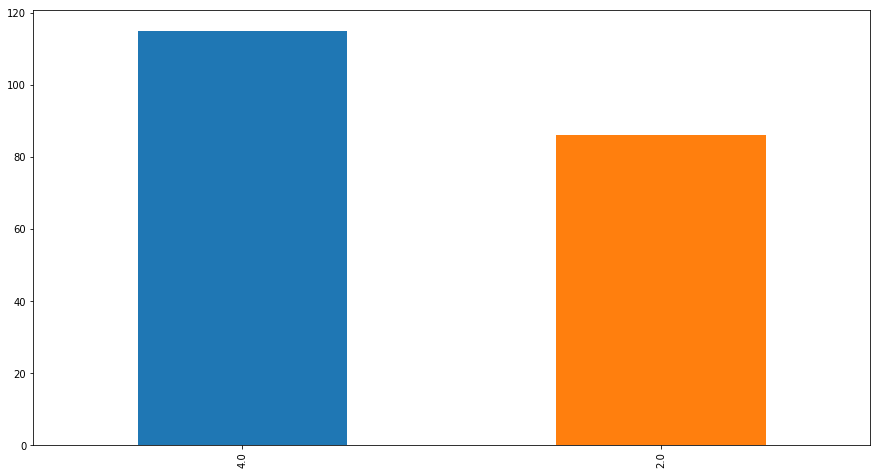

In [71]:
df['num-of-doors'].value_counts().plot.bar()

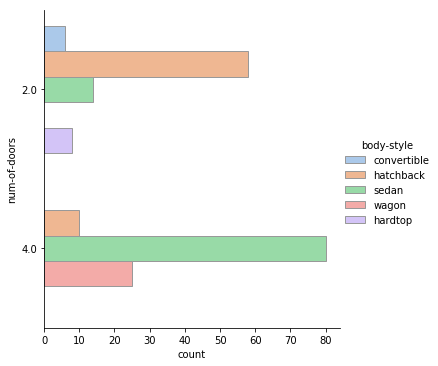

In [72]:
# let see how many convertible car are there in 2 and 4 door
sns.catplot(y="num-of-doors", hue="body-style", kind="count",palette="pastel", edgecolor=".6",data=df)

In 2 door car hatchback is most popular where as in 4 door car sedan is most popular

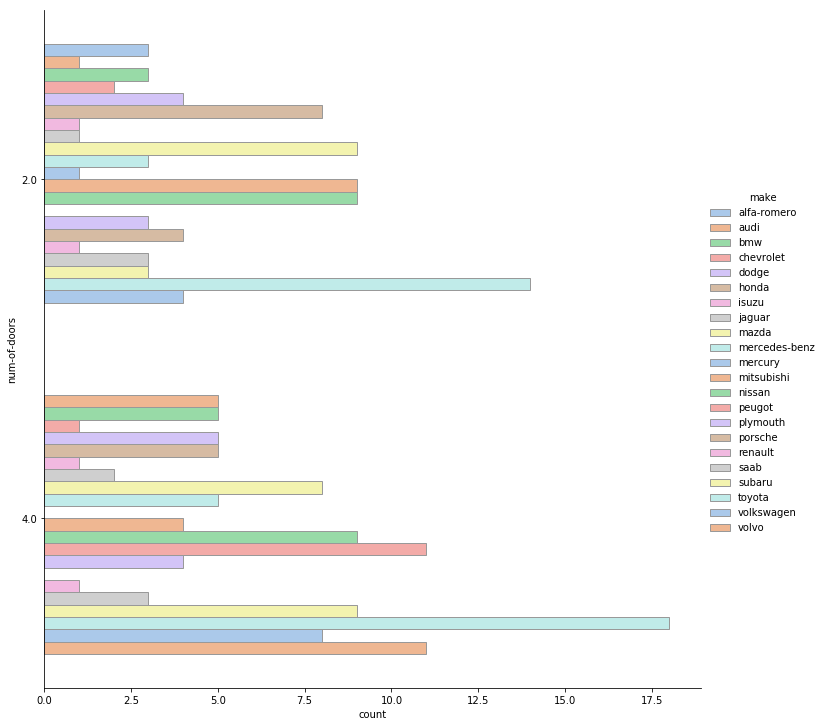

In [74]:
# which manufacturer is producing which type of car
sns.catplot(y="num-of-doors", hue="make", kind="count",palette="pastel",data=df, height=10, edgecolor='0.6')

in double door car hatchback is most popular where as in 4 door car sedan is most popular car.   
majority of the 2 and 4 seater car are produce by toyota

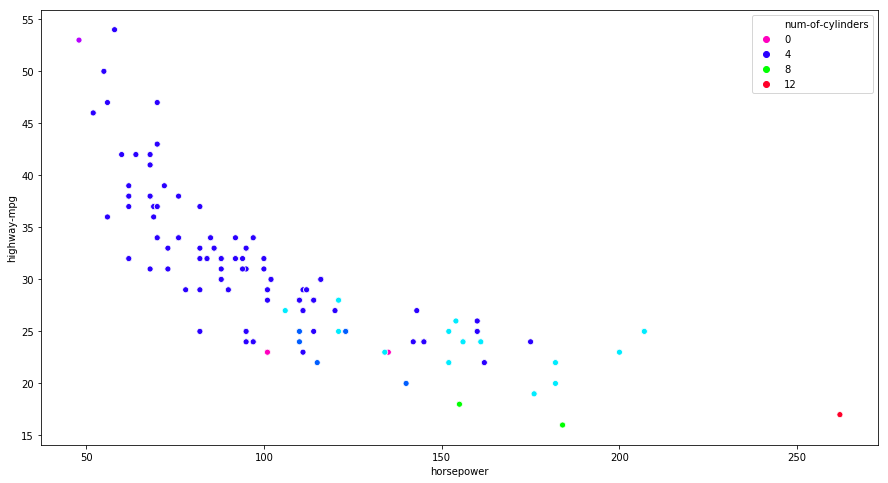

In [75]:
# lets se relation between mpg and horsepower
sns.scatterplot(x=df['horsepower'], y=df['highway-mpg'], hue=df['num-of-cylinders'],palette='gist_rainbow_r')

we can see that as that hp increases highway_mpg decreases

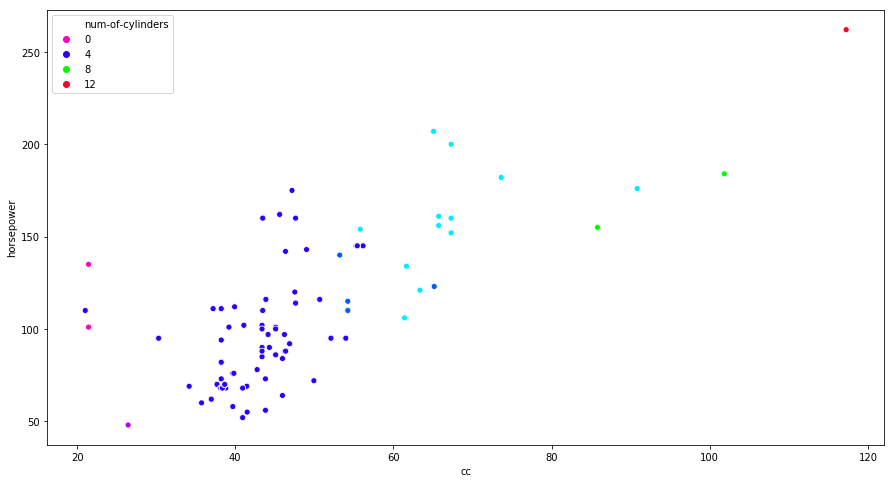

In [76]:
sns.scatterplot(y=df['horsepower'], x=df['cc'],palette='gist_rainbow_r',hue=df['num-of-cylinders'])

the scaling parameter is not consider therefore larger cc is not shown may be bore, stroke are in inch.   
but what we can se here is that as the cc increses the hp also increses.   
there seems to be a wrong entry as at 20 cc the hp are beyond 100 hp these seems to be somewhat unexpected

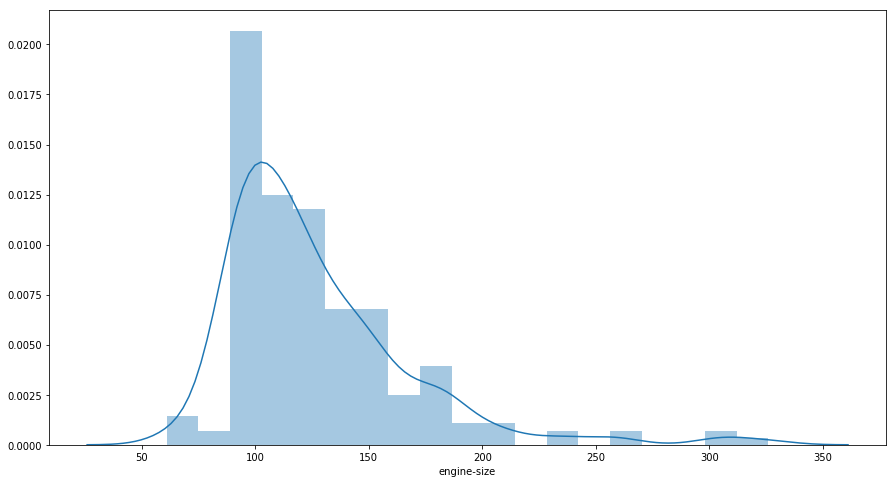

In [77]:
sns.distplot(df['engine-size'])

engine of 110 seems to be most popular

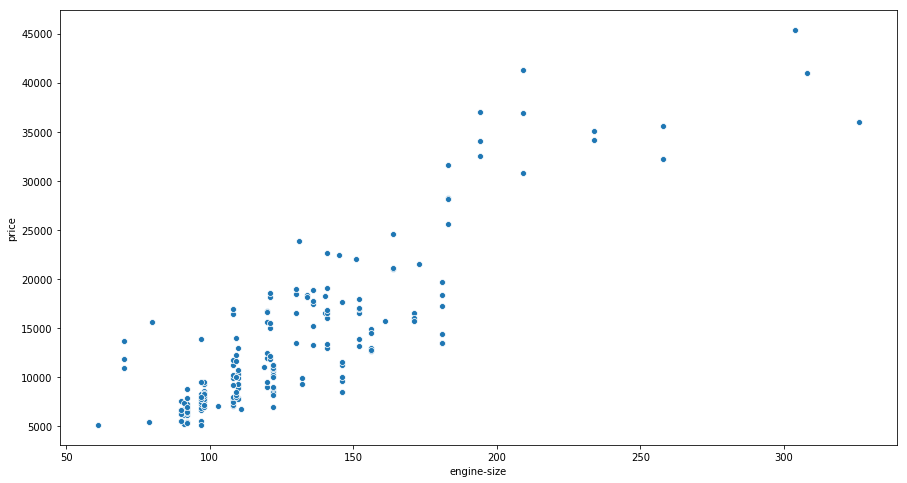

In [78]:
sns.scatterplot(df['engine-size'], target)

as the engine size increases the price also increases.   

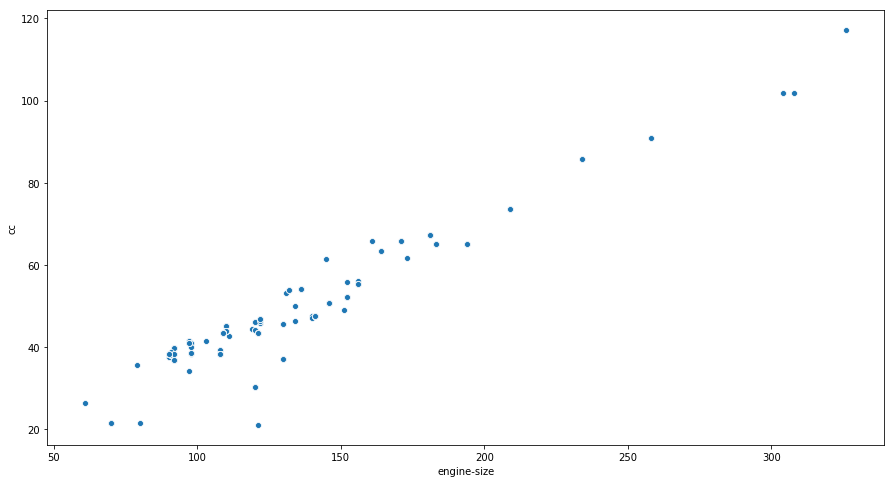

In [79]:
#let see the relation between cc and engine size
sns.scatterplot(df['engine-size'],df['cc'])

there is strong colinearity between cc and engine size same trend can be expected for horsepower and price as well  
we will be deleting one of its columns further

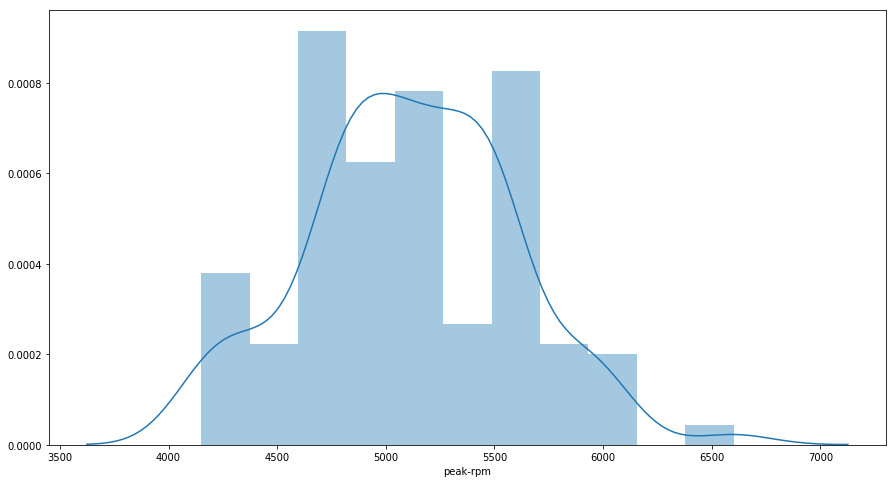

In [80]:
sns.distplot(df['peak-rpm'])

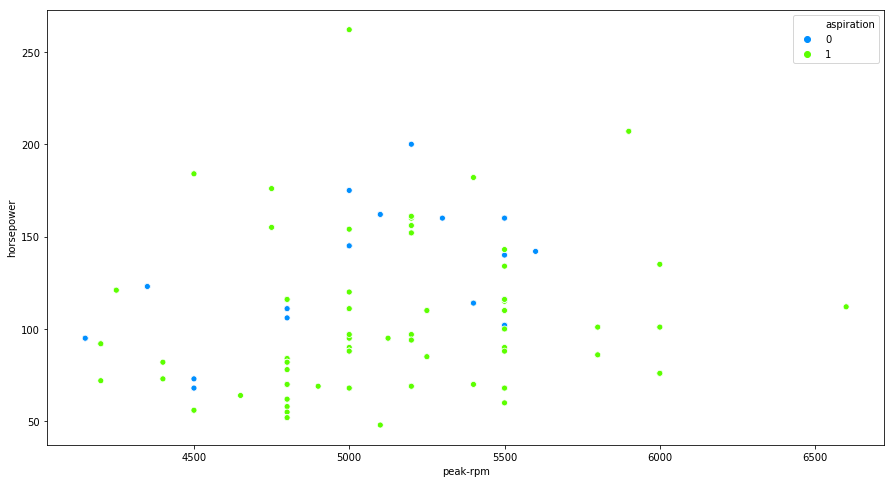

In [81]:
# let see relation between rpm and hp
sns.scatterplot(x=df['peak-rpm'],y=df['horsepower'], hue=df['aspiration'],palette='gist_rainbow_r')

the value of rpm are very unique. many vertical line can be seen.  
the turbo aspirated car are producing more horsepower for same rpm then the std aspirated car.   
there is no trend in peak rpm and horsepower

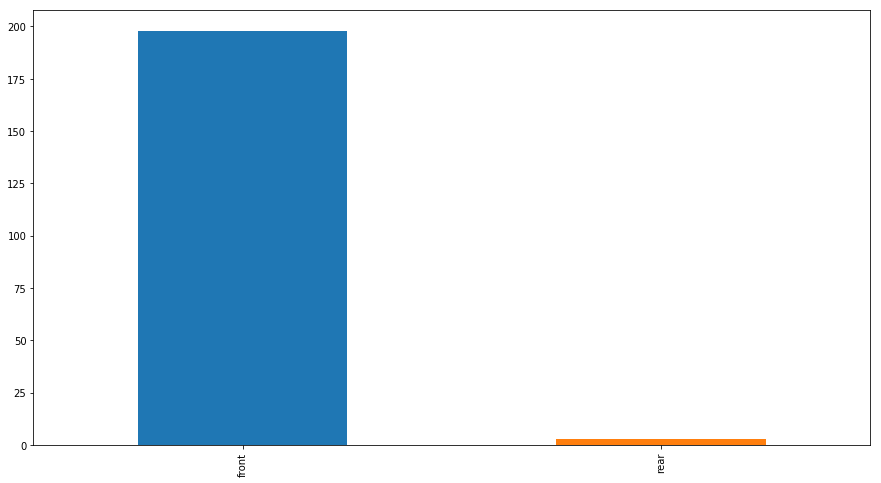

In [82]:
df['engine-location'].value_counts().plot.bar()

In [83]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

majority of the engine are mounted in the front let see what kind of car are there in rear

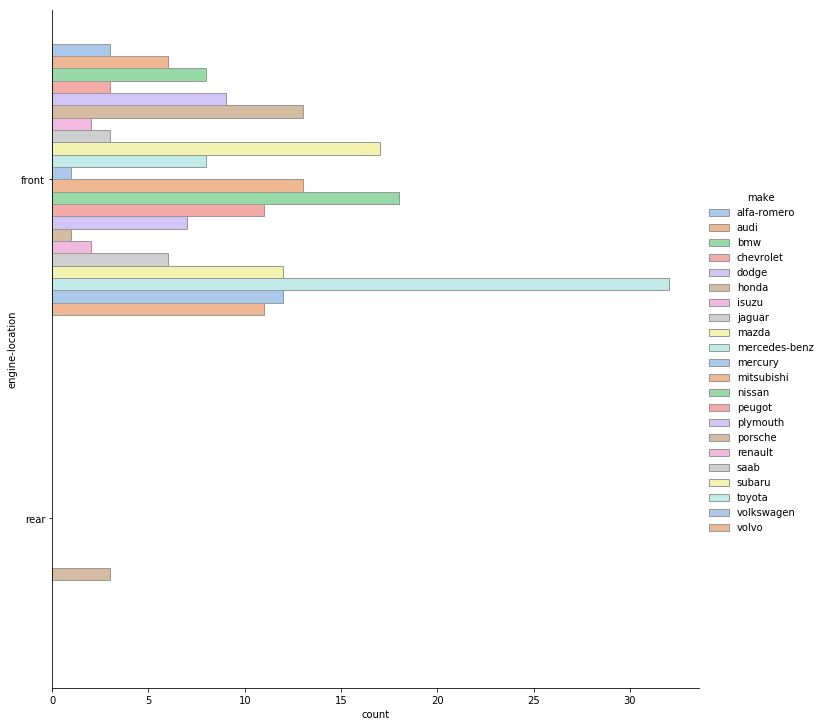

In [84]:
#let see which company is producing the rear engine car
sns.catplot(y="engine-location", hue="make", kind="count",palette="pastel",data=df, height=10, edgecolor='0.6')

there seems to very few car(<5) only rear car and that too is produce by porsche

In [85]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'hp_per_mpg',
       'cc'],
      dtype='object')

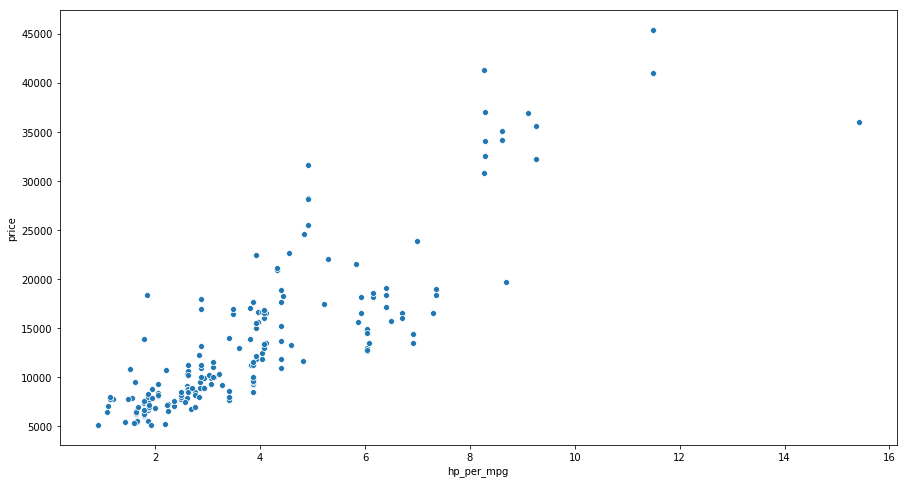

In [86]:
# let see relation between hp per mpg and price
sns.scatterplot(df['hp_per_mpg'],target)

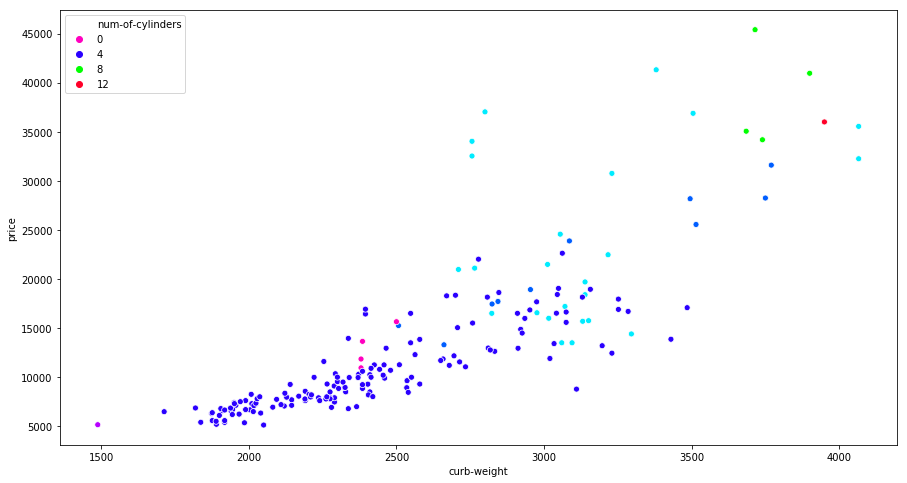

In [87]:
sns.scatterplot(df['curb-weight'],target,hue=df['num-of-cylinders'],palette='gist_rainbow_r')

as curb weight increses price also increases.   
it can be seen that 4 cylinder curb weight is heavily distributed between 1700 to 3200 and 6 cylinder are distributed between 3000 to 3500.

In [193]:
profit=pd.concat([df['make'], target], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

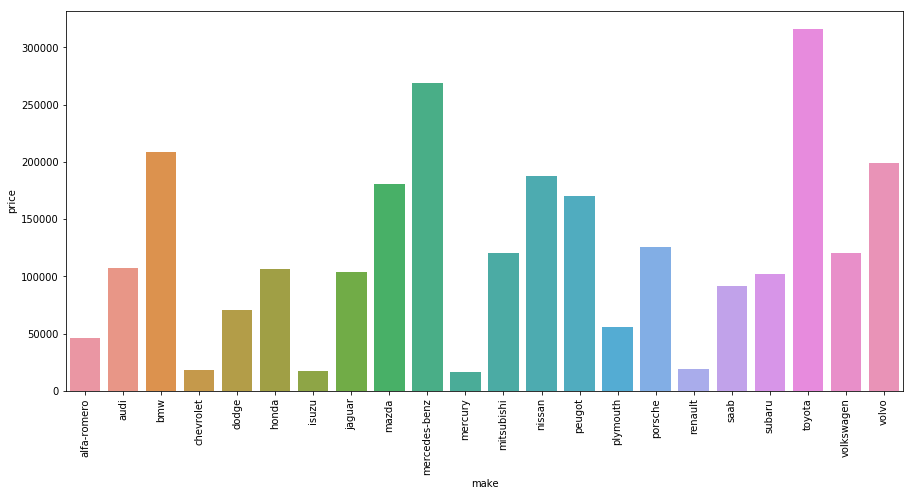

In [204]:
ind_profit=profit.groupby('make').sum()
sns.barplot(x=ind_profit.index,y='price', data=ind_profit)
plt.xticks(rotation=90)

In the profit game toyota is leading the game followed by mercedes and bmw. If we see the number of car manufactured in the above graph we find that the toyota was manufacturing the highest number of car followed by nissan, mazda and honda but in profit game mercedes benz bmw leave them behind. therefore we can say that the price of bmw, mercedes volvo are very high

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000058C9319080>,
      dtype=object)

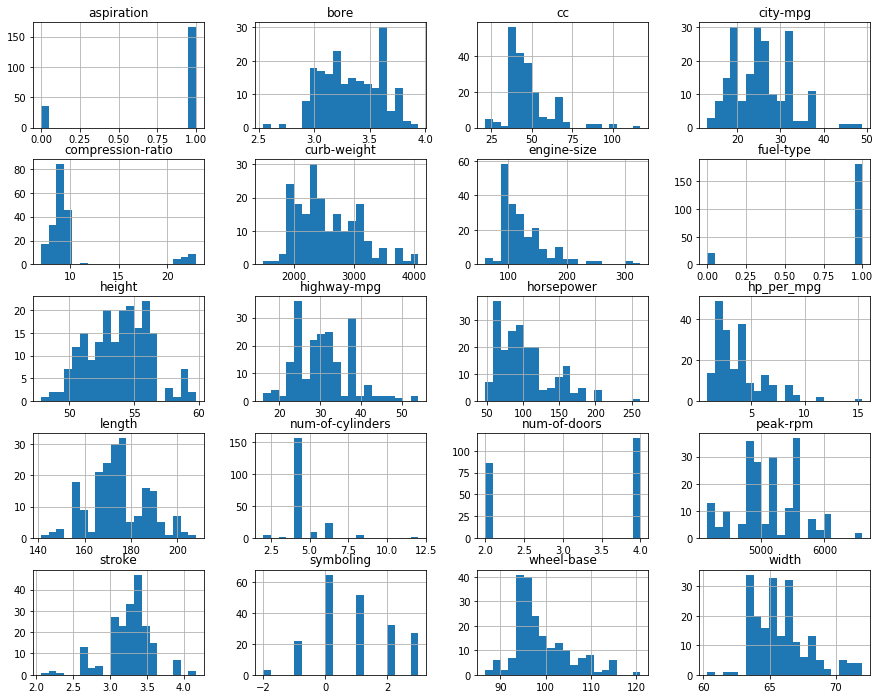

In [88]:
#viewing the histogram of overall dataset
df.hist(bins=20,figsize=(15,12))

In [89]:
df_d=df
data1=df_d

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

# let do some feature transformation
### tranforming the data to somewhat normal distribution by using boxcox, log1p and inverse transformation

In [91]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,df_d,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        df_d['cc']=df_d['cc'].apply(lambda x: boxcox1p(x,0.1))
        df_d['horsepower']=df_d['horsepower'].apply(lambda x:1/x)
        df_d['wheel-base']=df_d['wheel-base'].apply(lambda x:1/x)
        df_d['hp_per_mpg']=df_d['hp_per_mpg'].apply(lambda x:np.log1p(x))
        df_d['engine-size']=df_d['engine-size'].apply(lambda x:np.log1p(x))
        df_d['bore']=df_d['bore'].apply(lambda x:boxcox1p(x,0.4))
        df_d['city-mpg']=df_d['city-mpg'].apply(lambda x:boxcox1p(x,0.1))
        df_d['stroke']=df_d['stroke'].apply(lambda x:np.log1p(x))
        df_d['length']=df_d['length'].apply(lambda x:np.log1p(x))
        df_d['peak-rpm']=df_d['peak-rpm'].apply(lambda x:np.log1p(x))
        df_d['height']=df_d['height'].apply(lambda x:np.sqrt(x))
        return df_d

In [92]:
# calling fit_transform 
data1=FeaturesTransformer().fit_transform(df_d)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000058B117F0F0>,
      dtype=object)

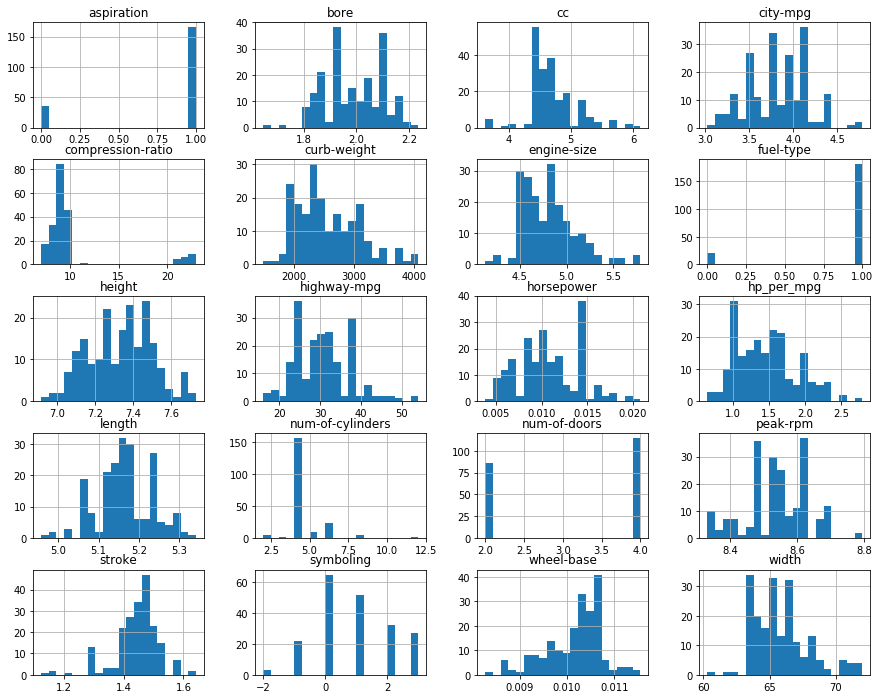

In [630]:
data1.hist(bins=20,figsize=(15,12))

now the data seems to be better normally distributed

In [93]:
# let view the dataframe
data1=pd.get_dummies(data1)
data1.head(15)

,symboling,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,1,1,2.0,0.011287,5.134621,64.1,6.985700,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,2.0,0.011287,5.134621,64.1,6.985700,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,2.0,0.010582,5.148657,65.5,7.238784,2823,6,...,1,0,0,0,0,0,0,1,0,0
3,2,1,1,4.0,0.010020,5.179534,66.2,7.368853,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,4.0,0.010060,5.179534,66.4,7.368853,2824,5,...,0,0,0,0,0,0,0,1,0,0
5,2,1,1,2.0,0.010020,5.183468,66.3,7.286975,2507,5,...,0,0,0,0,0,0,0,1,0,0
6,1,1,1,4.0,0.009452,5.266311,71.4,7.463243,2844,5,...,0,0,0,0,0,0,0,1,0,0
7,1,1,1,4.0,0.009452,5.266311,71.4,7.463243,2954,5,...,0,0,0,0,0,0,0,1,0,0
8,1,1,0,4.0,0.009452,5.266311,71.4,7.476630,3086,5,...,0,0,0,0,0,0,0,1,0,0
9,2,1,1,2.0,0.009881,5.180659,64.8,7.368853,2395,4,...,0,0,0,0,0,0,0,1,0,0


In [94]:
data1.shape

(201, 66)

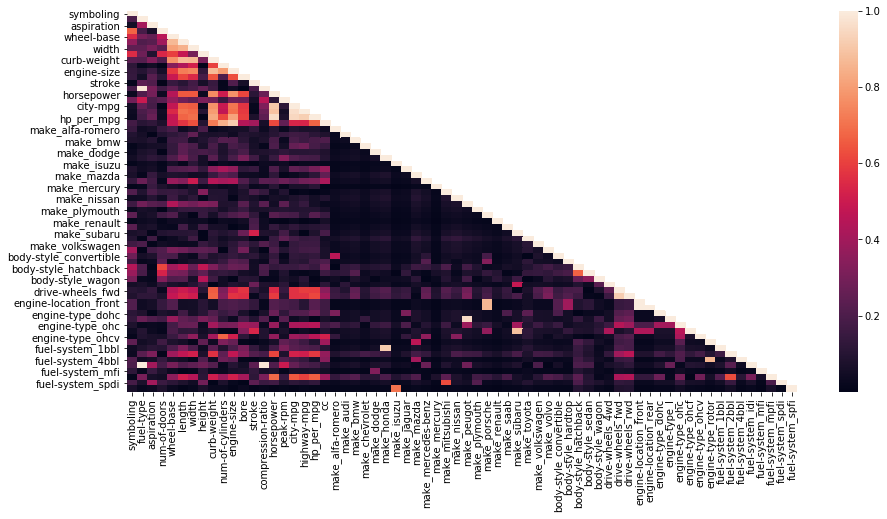

In [95]:
# checking the collinearity amoung the column in the data set
# taking the absolute value of the collinearity
corr_matrix=abs(data1.corr())
# creationg a lower triangular matrix of collinearity matrix
upper_tri=corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
plt.rcParams['figure.figsize']=(15,7)
sns.heatmap(upper_tri)

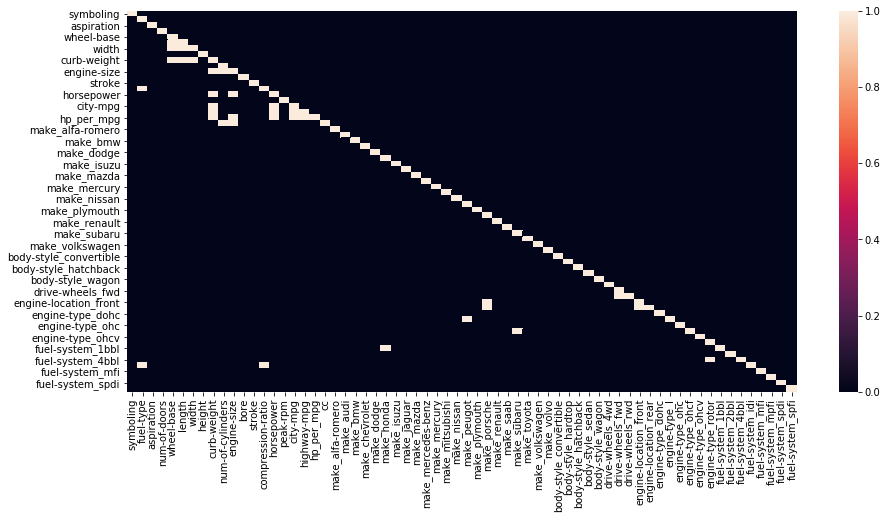

In [96]:
# viewing collinearity of greater then 0.75
sns.heatmap(upper_tri>0.75)

In [97]:
# fuction for getting name of the columns with high collinearity
def correlation(dataset, threshold):
    col_corr =set() # Set of all the names of deleted columns
    corr_matrix = abs(dataset.corr())
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [98]:
# converting into dataframe
c=correlation(data1, 0.7)
col_df=pd.DataFrame(list(c))
col_df

,0
0,engine-location_rear
1,length
2,width
3,fuel-system_idi
4,compression-ratio
5,curb-weight
6,engine-location_front
7,horsepower
8,cc
9,engine-type_l


In [99]:
# according to hierarchy principle the interacting term should not be deleted
rel=['cc','hp_per_mpg','horsepower','city-mpg','bore','stroke','num-of-cylinders']  
f=[] # an empty list to store the index 
for i in range(19):
    for j in range(7):
        if col_df.loc[i,0] == rel[j]:
            f.append(i)
f

[7, 8, 12, 18]

In [100]:
col_df=col_df.drop(index=f)   # droping the row of the interaction term

In [101]:
col_df  #finally the columns which are highly corelated that needs to be drop from the dataframe

,0
0,engine-location_rear
1,length
2,width
3,fuel-system_idi
4,compression-ratio
5,curb-weight
6,engine-location_front
9,engine-type_l
10,drive-wheels_rwd
11,fuel-system_4bbl


In [103]:
# dropping the columns 
data1=data1.drop(columns=col_df[0])

In [104]:
data1.head()

,symboling,fuel-type,aspiration,num-of-doors,wheel-base,height,num-of-cylinders,bore,stroke,horsepower,...,drive-wheels_4wd,drive-wheels_fwd,engine-type_dohc,engine-type_ohc,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
0,3,1,1,2.0,0.011287,6.985700,4,2.050541,1.302913,0.009009,...,0,0,1,0,0,0,0,0,1,0
1,3,1,1,2.0,0.011287,6.985700,4,2.050541,1.302913,0.009009,...,0,0,1,0,0,0,0,0,1,0
2,1,1,1,2.0,0.010582,7.238784,6,1.709971,1.497388,0.006494,...,0,0,0,0,1,0,0,0,1,0
3,2,1,1,4.0,0.010020,7.368853,4,1.934306,1.481605,0.009804,...,0,1,0,1,0,0,0,0,1,0
4,2,1,1,4.0,0.010060,7.368853,5,1.934306,1.481605,0.008696,...,1,0,0,1,0,0,0,0,1,0


finally our number of rows are decreases from 66 to 51 after dropping the correlated columns

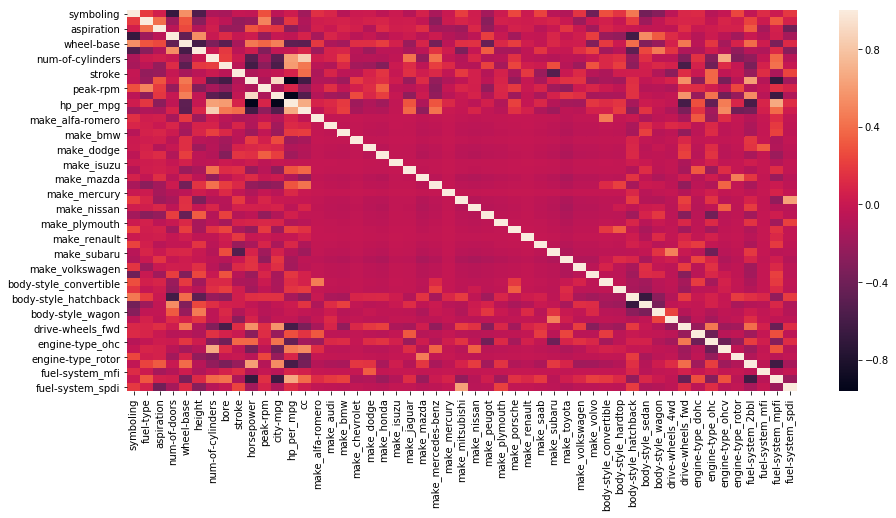

In [105]:
# viewing the heatmap of the remaining columns
sns.heatmap(data1.corr())

What we have done till now.  
1) cleaned the dataframe by filling nan value with mean or median imputation.   
2) droped the columns in which missing value is more than 15%.  
3) droped the row in which the price was missing
4) perform Eda
5) get the correlation matrix and drop the columns which are highly correlated

# let do some stats

as price is a continous variable so we can use linear regression

In [106]:
import statsmodels.api as sm

In [109]:
data1 = sm.add_constant(data1)   # adding constant to the dataframe

In [110]:
data1.columns

Index(['const', 'symboling', 'fuel-type', 'aspiration', 'num-of-doors',
       'wheel-base', 'height', 'num-of-cylinders', 'bore', 'stroke',
       'horsepower', 'peak-rpm', 'city-mpg', 'hp_per_mpg', 'cc',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'engine-type_dohc',
       'engine-type_ohc', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_2bbl', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi'],
      dtype='object')

In [111]:
regressor_OLS=sm.OLS(endog=target,exog=data1).fit()    # fitting the ordinary leadt square

In [112]:
regressor_OLS.summary()   #summary of the regerssion 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     58.21
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           9.32e-77
Time:                        00:42:02   Log-Likelihood:                -1789.3
No. Observations:                 201   AIC:                             3679.
Df Residuals:                     151   BIC:                             3844.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.001e+04   3.21e+04      0.312      0.755   -5.34e+04    7.34e+04
symboling               -145.4076    294.696     -0.493      0.622    -727.667     436.852
fuel-type              -1093.3838   1521.087     -0.719      0.473   -4098.747    1911.979
aspiration             -1351.4331    803.220     -1.683      0.095   -2938.435     235.569
num-of-doors             271.6713    285.454      0.952      0.343    -292.328     835.670
wheel-base             -3.688e+06   8.29e+05     -4.451      0.000   -5.33e+06   -2.05e+06
height                 -5343.7715   2300.960     -2.322      0.022   -9890.006    -797.537
num-of-cylinders       -2725.1007   1389.495     -1.961      0.052   -5470.464      20.263
bore                   -1.084e+04   5268.042     -2.058      0.041   -2.12e+04    -430.835
stroke                 -2.987e+04   1.32e+04     -2.261      0.025    -5.6e+04   -3766.178
horsepower              1.108e+06   2.37e+05      4.668      0.000    6.39e+05    1.58e+06
peak-rpm                3397.0544   3337.576      1.018      0.310   -3197.325    9991.434
city-mpg                4817.8525   2489.129      1.936      0.055    -100.165    9735.870
hp_per_mpg              1.756e+04   3367.819      5.213      0.000    1.09e+04    2.42e+04
cc                      1.614e+04   5865.044      2.751      0.007    4547.805    2.77e+04
make_alfa-romero        2878.0287   1934.753      1.488      0.139    -944.654    6700.711
make_audi               1851.1362   2036.039      0.909      0.365   -2171.668    5873.940
make_bmw                6828.2847   2068.719      3.301      0.001    2740.912    1.09e+04
make_chevrolet         -2191.5853   2106.357     -1.040      0.300   -6353.323    1970.153
make_dodge             -2017.8634   1766.490     -1.142      0.255   -5508.092    1472.365
make_honda               641.5088   2112.845      0.304      0.762   -3533.047    4816.065
make_isuzu             -1901.1385   2125.146     -0.895      0.372   -6100.000    2297.723
make_jaguar             6252.7904   2260.225      2.766      0.006    1787.041    1.07e+04
make_mazda               373.9309   1635.879      0.229      0.820   -2858.237    3606.099
make_mercedes-benz      7454.6825   2006.406      3.715      0.000    3490.427    1.14e+04
make_mercury           -3504.5102   2871.542     -1.220      0.224   -9178.100    2169.080
make_mitsubishi        -1910.5873   1716.886     -1.113      0.268   -5302.810    1481.635
make_nissan            -1114.9402   1738.795     -0.641      0.522   -4550.449    2320.568
make_peugot            -5976.2894   2271.093     -2.631      0.009   -1.05e+04   -1489.066
make_plymouth          -2229.2540   1805.299     -1.235      0.219   -5796.161    1337.653
make_porsche            8569.0665   2610.399      3.283      0.001    3411.444  

f score indicate that not all our coefficeint are zero there are variable which can help us in estimating the price of car.   
the adjusted r-squared indicate that the model fiited well
where as p value of individual coefficeint tell us that indeed there needs to drop few coefficient which are not helping us to estimate the price 

In [113]:
# sorting the p value in descending order
s=regressor_OLS.pvalues.sort_values(ascending=False)
s

fuel-system_mfi           9.932451e-01
body-style_wagon          9.356373e-01
make_volkswagen           9.044681e-01
body-style_sedan          8.970070e-01
body-style_hatchback      8.801571e-01
make_renault              8.689772e-01
make_volvo                8.295544e-01
make_mazda                8.195039e-01
fuel-system_spdi          7.951225e-01
drive-wheels_4wd          7.923597e-01
body-style_hardtop        7.816606e-01
make_honda                7.618329e-01
const                     7.553785e-01
symboling                 6.224354e-01
fuel-system_mpfi          5.757414e-01
make_nissan               5.223554e-01
fuel-type                 4.733644e-01
fuel-system_2bbl          3.991992e-01
make_isuzu                3.724290e-01
make_audi                 3.647014e-01
body-style_convertible    3.615243e-01
num-of-doors              3.427610e-01
peak-rpm                  3.103911e-01
make_chevrolet            2.997882e-01
engine-type_rotor         2.839416e-01
make_mitsubishi          

In [114]:
# making dataframe out the p value and the column name
p_value=pd.DataFrame(s)
p_value['name']=p_value.index
p_value.reset_index(drop=True)

,0,name
0,9.932451e-01,fuel-system_mfi
1,9.356373e-01,body-style_wagon
2,9.044681e-01,make_volkswagen
3,8.970070e-01,body-style_sedan
4,8.801571e-01,body-style_hatchback
5,8.689772e-01,make_renault
6,8.295544e-01,make_volvo
7,8.195039e-01,make_mazda
8,7.951225e-01,fuel-system_spdi
9,7.923597e-01,drive-wheels_4wd


In [123]:
l=[]
#getting the dataframe whose p value is >0.1
for i in range(s.shape[0]):
    if s.iloc[i]>0.1:
        q=s.index[i]
        l.append(q)
l=pd.DataFrame(l)
g=[]
# deleting the column name which are interacting term
rel=['cc','hp_per_mpg','horsepower','city-mpg','bore','stroke','num-of-cylinders']
for i in range(l.shape[0]):
    for j in range(7):
        if l[0].iloc[i] == rel[j]:
            g.append(i)
g

[]

In [116]:
l=l.drop(index=g)

In [117]:
data1.columns

Index(['const', 'symboling', 'fuel-type', 'aspiration', 'num-of-doors',
       'wheel-base', 'height', 'num-of-cylinders', 'bore', 'stroke',
       'horsepower', 'peak-rpm', 'city-mpg', 'hp_per_mpg', 'cc',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'engine-type_dohc',
       'engine-type_ohc', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_2bbl', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi'],
      dtype='object')

In [118]:
data2=data1.drop(columns=l[0])   # dropping the columns

In [119]:
data2.columns

Index(['aspiration', 'wheel-base', 'height', 'num-of-cylinders', 'bore',
       'stroke', 'horsepower', 'city-mpg', 'hp_per_mpg', 'cc', 'make_bmw',
       'make_jaguar', 'make_mercedes-benz', 'make_peugot', 'make_porsche',
       'make_saab', 'make_subaru', 'engine-type_dohc', 'engine-type_ohc',
       'engine-type_ohcv'],
      dtype='object')

In [120]:
data2 = sm.add_constant(data2)    #adding the constant
data2.head()

,const,aspiration,wheel-base,height,num-of-cylinders,bore,stroke,horsepower,city-mpg,hp_per_mpg,...,make_bmw,make_jaguar,make_mercedes-benz,make_peugot,make_porsche,make_saab,make_subaru,engine-type_dohc,engine-type_ohc,engine-type_ohcv
0,1.0,1,0.011287,6.985700,4,2.050541,1.302913,0.009009,3.622044,1.631417,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,0.011287,6.985700,4,2.050541,1.302913,0.009009,3.622044,1.631417,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,0.010582,7.238784,6,1.709971,1.497388,0.006494,3.492828,1.934860,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,0.010020,7.368853,4,1.934306,1.481605,0.009804,3.797297,1.481605,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1,0.010060,7.368853,5,1.934306,1.481605,0.008696,3.423797,1.828938,...,0,0,0,0,0,0,0,0,1,0


In [121]:
data2.shape

(201, 21)

In [124]:
regressor_OLS1=sm.OLS(endog=target,exog=data2).fit()   #fitting the ols
regressor_OLS1.summary()   # getting the summary of the ols

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           2.00e-87
Time:                        00:50:29   Log-Likelihood:                -1836.2
No. Observations:                 201   AIC:                             3714.
Df Residuals:                     180   BIC:                             3784.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.175e+04   2.36e+04      1.348      0.179   -1.47e+04    7.83e+04
aspiration          -745.1529    604.766     -1.232      0.220   -1938.495     448.190
wheel-base         -2.988e+06   6.38e+05     -4.685      0.000   -4.25e+06   -1.73e+06
height             -2129.5109   1634.947     -1.302      0.194   -5355.639    1096.617
num-of-cylinders   -1354.2466   1148.215     -1.179      0.240   -3619.939     911.446
bore               -4790.3373   4554.936     -1.052      0.294   -1.38e+04    4197.603
stroke             -2.264e+04   8926.157     -2.537      0.012   -4.03e+04   -5031.323
horsepower           7.45e+05   2.34e+05      3.184      0.002    2.83e+05    1.21e+06
city-mpg            1156.1949   2093.811      0.552      0.581   -2975.377    5287.767
hp_per_mpg          1.332e+04   3247.942      4.102      0.000    6913.538    1.97e+04
cc                  1.059e+04   3960.522      2.675      0.008    2779.657    1.84e+04
make_bmw            7823.5280   1071.437      7.302      0.000    5709.336    9937.720
make_jaguar         7140.2842   2062.972      3.461      0.001    3069.563    1.12e+04
make_mercedes-benz  1.017e+04   1154.314      8.810      0.000    7891.530    1.24e+04
make_peugot        -7113.8553   1966.664     -3.617      0.000    -1.1e+04   -3233.174
make_porsche        8897.9826   2251.331      3.952      0.000    4455.586    1.33e+04
make_saab           2481.5438   1152.824      2.153      0.033     206.756    4756.332
make_subaru        -9297.6483   2088.337     -4.452      0.000   -1.34e+04   -5176.877
engine-type_dohc   -7380.4898   2005.719     -3.680      0.000   -1.13e+04   -3422.742
engine-type_ohc    -6691.9392   1686.486     -3.968      0.000      -1e+04   -3364.112
engine-type_ohcv   -8317.1172   2155.378     -3.859      0.000   -1.26e+04   -4064.060
==============================================================================
Omnibus:                       46.874   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.428
Skew:                           1.053   Prob(JB):                     4.70e-24
Kurtosis:                       5.897   Cond. No.                     4.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

by removing columns with low p value we had increased our **f score drastically from 53 to 103**.   
we will have to keep the value **cc, bore, num-of-cylinders, hp_per_mpg, horesepower, highway-mpg because of principle of hierarchy**.

(array([12., 23., 65., 61., 22., 10.,  5.,  1.,  1.,  1.]),
 array([-2.06369102, -1.40594156, -0.7481921 , -0.09044265,  0.56730681,
         1.22505627,  1.88280573,  2.54055518,  3.19830464,  3.8560541 ,
         4.51380356]),
 <a list of 10 Patch objects>)

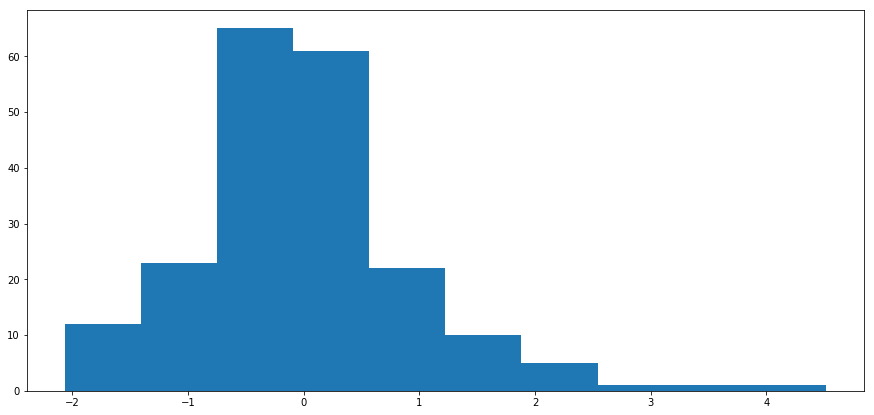

In [125]:
plt.hist(regressor_OLS1.resid_pearson,bins=10)  #plotting the histogram of the residual

In [126]:
# let check the potential outlier with z score
z_score_greater=np.where(regressor_OLS1.resid_pearson>2)

In [127]:
# point whose z score is greater than 2 standard deviation lets see it
data2.loc[z_score_greater]

,const,aspiration,wheel-base,height,num-of-cylinders,bore,stroke,horsepower,city-mpg,hp_per_mpg,...,make_bmw,make_jaguar,make_mercedes-benz,make_peugot,make_porsche,make_saab,make_subaru,engine-type_dohc,engine-type_ohc,engine-type_ohcv
1,1.0,1,0.011287,6.985700,4,2.050541,1.302913,0.009009,3.622044,1.631417,...,0,0,0,0,0,0,0,1,0,0
15,1.0,1,0.009662,7.328028,6,2.111018,1.479329,0.005495,3.275317,2.227078,...,1,0,0,0,0,0,0,0,1,0
63,1.0,1,0.009533,7.375636,4,2.034209,1.534714,0.013889,4.142136,1.045969,...,0,0,0,0,0,0,0,0,1,0
71,1.0,1,0.008929,7.443118,8,2.182055,1.470176,0.005435,3.110194,2.525729,...,0,0,1,0,0,0,0,0,0,1
168,1.0,1,0.010163,7.280110,4,2.111018,1.504077,0.008621,3.797297,1.582409,...,0,0,0,0,0,0,0,0,1,0
200,1.0,0,0.009166,7.449832,4,2.174242,1.423108,0.008772,3.492828,1.715598,...,0,0,0,0,0,0,0,0,1,0


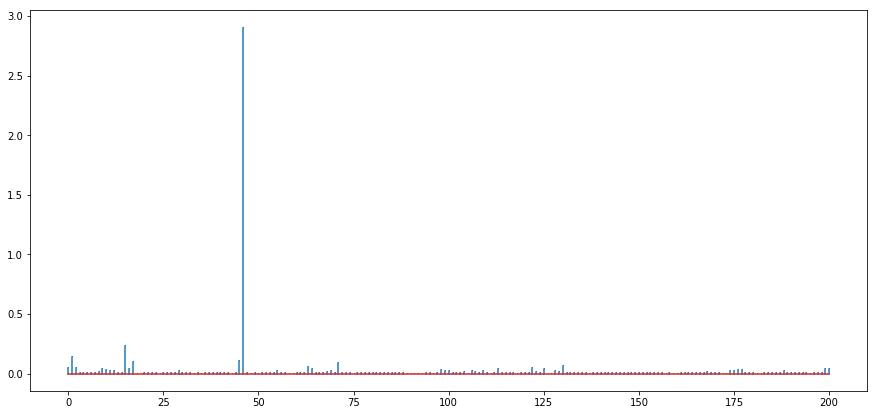

In [128]:
influence = regressor_OLS1.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
# getting the cooks distance greater than 4/n 
v=np.where(c>4/200)
v
e=[1,15,16,29,63,71]   # taking union of the cooks distance and residual more the 2 standard deviation these point are outlier

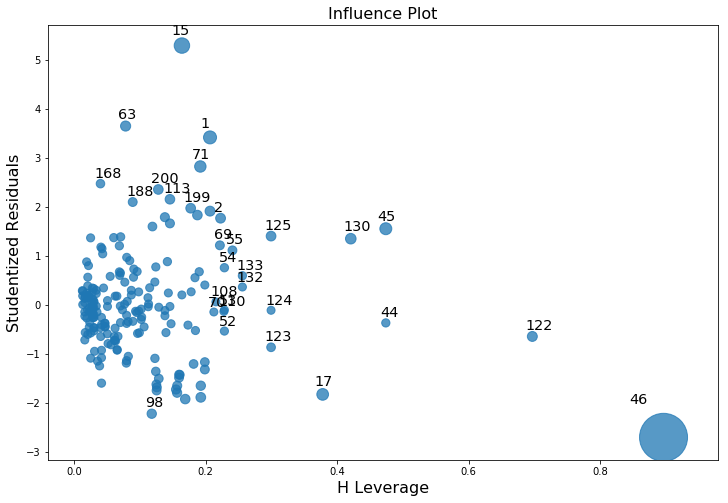

In [129]:
# plotting the levarahe and residual
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(regressor_OLS1, ax=ax, criterion="cooks")

In [130]:
data2.shape

(201, 21)

In [131]:
outlier=data2.loc[e]  # getting the location of the outlier
outlier.shape

(6, 21)

In [132]:
outlier

,const,aspiration,wheel-base,height,num-of-cylinders,bore,stroke,horsepower,city-mpg,hp_per_mpg,...,make_bmw,make_jaguar,make_mercedes-benz,make_peugot,make_porsche,make_saab,make_subaru,engine-type_dohc,engine-type_ohc,engine-type_ohcv
1,1.0,1,0.011287,6.985700,4,2.050541,1.302913,0.009009,3.622044,1.631417,...,0,0,0,0,0,0,0,1,0,0
15,1.0,1,0.009662,7.328028,6,2.111018,1.479329,0.005495,3.275317,2.227078,...,1,0,0,0,0,0,0,0,1,0
16,1.0,1,0.009091,7.503333,6,2.111018,1.479329,0.005495,3.195079,2.312535,...,1,0,0,0,0,0,0,0,1,0
29,1.0,1,0.011547,7.127412,4,1.813310,1.483875,0.017241,4.787576,0.729515,...,0,0,0,0,0,0,0,0,1,0
63,1.0,1,0.009533,7.375636,4,2.034209,1.534714,0.013889,4.142136,1.045969,...,0,0,0,0,0,0,0,0,1,0
71,1.0,1,0.008929,7.443118,8,2.182055,1.470176,0.005435,3.110194,2.525729,...,0,0,1,0,0,0,0,0,0,1


In [133]:
data3=data2

In [134]:
data3=data3.drop(index=outlier.index)  # dropping the outlier

In [135]:
data3.shape

(195, 21)

In [136]:
target3=target.drop(outlier.index)  # dropping the index corresponding to outlier from the target variable also

In [137]:
regressor_OLS3=sm.OLS(endog=target3,exog=data3).fit()  # fitting the ordinary least  square

In [138]:
regressor_OLS3.summary()   #summary of the ols

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           3.51e-93
Time:                        00:58:19   Log-Likelihood:                -1739.6
No. Observations:                 195   AIC:                             3521.
Df Residuals:                     174   BIC:                             3590.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.285e+04   1.98e+04      2.663      0.008    1.37e+04     9.2e+04
aspiration         -1478.9198    505.702     -2.924      0.004   -2477.019    -480.820
wheel-base         -3.074e+06   5.41e+05     -5.687      0.000   -4.14e+06   -2.01e+06
height              -864.9031   1332.184     -0.649      0.517   -3494.223    1764.416
num-of-cylinders   -1407.8501    931.268     -1.512      0.132   -3245.885     430.185
bore               -7107.1496   3717.427     -1.912      0.058   -1.44e+04     229.904
stroke             -2.543e+04   7289.919     -3.488      0.001   -3.98e+04    -1.1e+04
horsepower          3.013e+05   2.01e+05      1.500      0.135   -9.51e+04    6.98e+05
city-mpg            -815.8562   1810.909     -0.451      0.653   -4390.033    2758.320
hp_per_mpg          7533.3538   2877.496      2.618      0.010    1854.065    1.32e+04
cc                  1.093e+04   3212.125      3.403      0.001    4591.815    1.73e+04
make_bmw            5484.2628    935.438      5.863      0.000    3637.996    7330.529
make_jaguar         9861.2648   1703.819      5.788      0.000    6498.453    1.32e+04
make_mercedes-benz  9876.8301    966.024     10.224      0.000    7970.196    1.18e+04
make_peugot        -8376.7940   1616.550     -5.182      0.000   -1.16e+04   -5186.223
make_porsche        9521.5385   1834.227      5.191      0.000    5901.341    1.31e+04
make_saab           2090.5005    949.026      2.203      0.029     217.416    3963.585
make_subaru        -1.023e+04   1710.330     -5.982      0.000   -1.36e+04   -6855.103
engine-type_dohc   -8599.1430   1643.244     -5.233      0.000   -1.18e+04   -5355.887
engine-type_ohc    -7661.5970   1374.470     -5.574      0.000   -1.04e+04   -4948.818
engine-type_ohcv   -8603.0400   1750.493     -4.915      0.000   -1.21e+04   -5148.107
==============================================================================
Omnibus:                        7.825   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.675
Skew:                           0.425   Prob(JB):                       0.0215
Kurtosis:                       3.473   Cond. No.                     4.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

as soon as we drop the outlier we van see that our aspiration and constant p values become significant. the p value if the number of cylinders and bore also decreased by almost half.  
both r-square and adjusted r square increased

In [139]:
data3=data3.drop(columns='height')   #  height is not related to any interaction term we will drop the as its p value is high

In [140]:
regressor_OLS4=sm.OLS(endog=target3,exog=data3).fit()

In [141]:
regressor_OLS4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           3.65e-94
Time:                        01:03:04   Log-Likelihood:                -1739.9
No. Observations:                 195   AIC:                             3520.
Df Residuals:                     175   BIC:                             3585.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.407e+04   1.45e+04      3.040      0.003    1.55e+04    7.27e+04
aspiration         -1487.0097    504.712     -2.946      0.004   -2483.116    -490.904
wheel-base         -2.868e+06   4.36e+05     -6.576      0.000   -3.73e+06   -2.01e+06
num-of-cylinders   -1272.3921    906.093     -1.404      0.162   -3060.669     515.885
bore               -6626.9833   3637.087     -1.822      0.070   -1.38e+04     551.217
stroke             -2.442e+04   7110.750     -3.434      0.001   -3.85e+04   -1.04e+04
horsepower          2.693e+05   1.94e+05      1.386      0.168   -1.14e+05    6.53e+05
city-mpg            -778.5973   1807.006     -0.431      0.667   -4344.926    2787.732
hp_per_mpg          7420.9891   2867.535      2.588      0.010    1761.586    1.31e+04
cc                  1.043e+04   3113.910      3.351      0.001    4287.577    1.66e+04
make_bmw            5481.2954    933.880      5.869      0.000    3638.179    7324.412
make_jaguar         1.008e+04   1666.042      6.053      0.000    6796.256    1.34e+04
make_mercedes-benz  9948.0333    958.191     10.382      0.000    8056.935    1.18e+04
make_peugot        -8305.3156   1610.129     -5.158      0.000   -1.15e+04   -5127.546
make_porsche        9477.0487   1829.914      5.179      0.000    5865.507    1.31e+04
make_saab           1912.5455    907.079      2.108      0.036     122.324    3702.767
make_subaru         -1.02e+04   1706.858     -5.976      0.000   -1.36e+04   -6831.624
engine-type_dohc   -8506.0888   1634.273     -5.205      0.000   -1.17e+04   -5280.667
engine-type_ohc    -7612.8179   1370.145     -5.556      0.000   -1.03e+04   -4908.684
engine-type_ohcv   -8542.6908   1745.132     -4.895      0.000    -1.2e+04   -5098.477
==============================================================================
Omnibus:                        7.443   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.295
Skew:                           0.405   Prob(JB):                       0.0261
Kurtosis:                       3.492   Cond. No.                     2.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# checking the assumption of linear regression

In [144]:
ypred=regressor_OLS4.predict(data3) # predicting the value 

In [164]:
regressor_OLS4.model.exog

array([[1.        , 1.        , 0.01128668, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.01058201, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.01002004, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.0091659 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.0091659 , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.0091659 , ..., 0.        , 1.        ,
        0.        ]])

In [153]:
residual=target3-ypred
residual=pd.Series(residual)

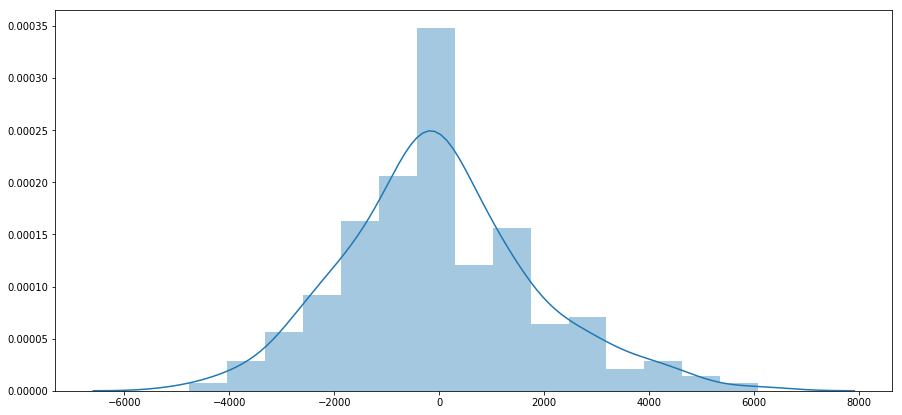

In [159]:
# checking normality of the error
sns.distplot(residual)

the residual seems to be normaly distributed 

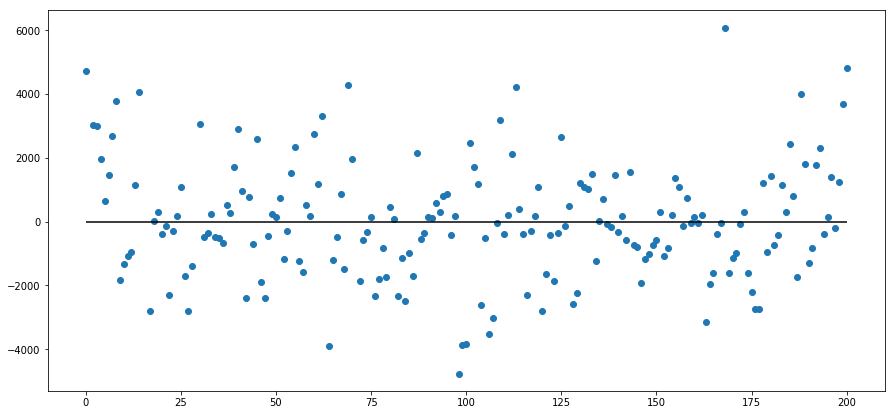

In [158]:
# independence of error
plt.scatter(residual.index,residual.values)
plt.hlines(0,0,200)

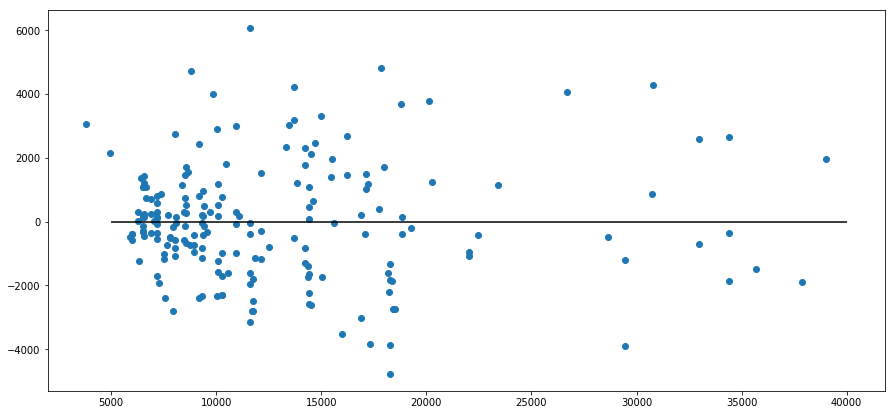

In [218]:
# homoscadasity
plt.scatter(ypred, residual)
plt.hlines(0,5000,40000)

there seems to be no fanning.

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor

In [ ]:
# further studies
creating feature such that the residual is bought down if we observe the residual closesly we find that residual to  

In [219]:
l = [variance_inflation_factor(data3.values, i) for i in range(data3.shape[1])]
vif_value=pd.Series(index=data3.columns,data=l).sort_values(ascending=False)

In [220]:
vif_value

const                 11176.651428
hp_per_mpg               70.398973
cc                       68.758773
num-of-cylinders         45.968298
horsepower               22.906896
engine-type_ohc          19.987763
city-mpg                 17.994267
stroke                   15.953106
engine-type_ohcv          9.352062
make_subaru               8.946342
bore                      8.598650
engine-type_dohc          7.559243
make_peugot               7.337536
make_porsche              3.577448
wheel-base                3.305423
make_jaguar               2.235696
aspiration                2.038946
make_mercedes-benz        1.689580
make_bmw                  1.382973
make_saab                 1.304733
dtype: float64

generally the vif value greater then 10 is consider as columns with high multicollinearity
since the hp, cc,num-of-cylinder,hp_per_mpg,bore,stroke,city_mpg are interaction term so wecant delete them

# Future work 

### since the residual value are high and r square value is also high we can use another algorithmn such as k nearest neighbour, random forest with different technique and check the score.
### we can get more feature like torque, time to reach 0 to 100mph, top speed etc which may result in decrease in residual  